<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/8_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Librerias, Data Frame y valores numericos separados**

In [1]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
#Cargar archivo csv desde seaborn
df=pd.read_excel("Datos_Cuentas_BNO.xlsx")

In [11]:
num_df = df[[
    "limite_credito",
    "precio", 
    "enganche",
    "descuento",
    "semana",
    "monto_financiado",
    "costo_total",
    "monto_accesorios",
    "status",
    "fraude",
    "inversion",
    "pagos_realizados",
    "reautorizacion",
    "puntos",
    "riesgo",
    "score_buro",
    "porc_eng",
    "semana_actual",
    "edad_cliente"
]]


**Analisis de Variables contra "LIMITE_CREDITO**

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


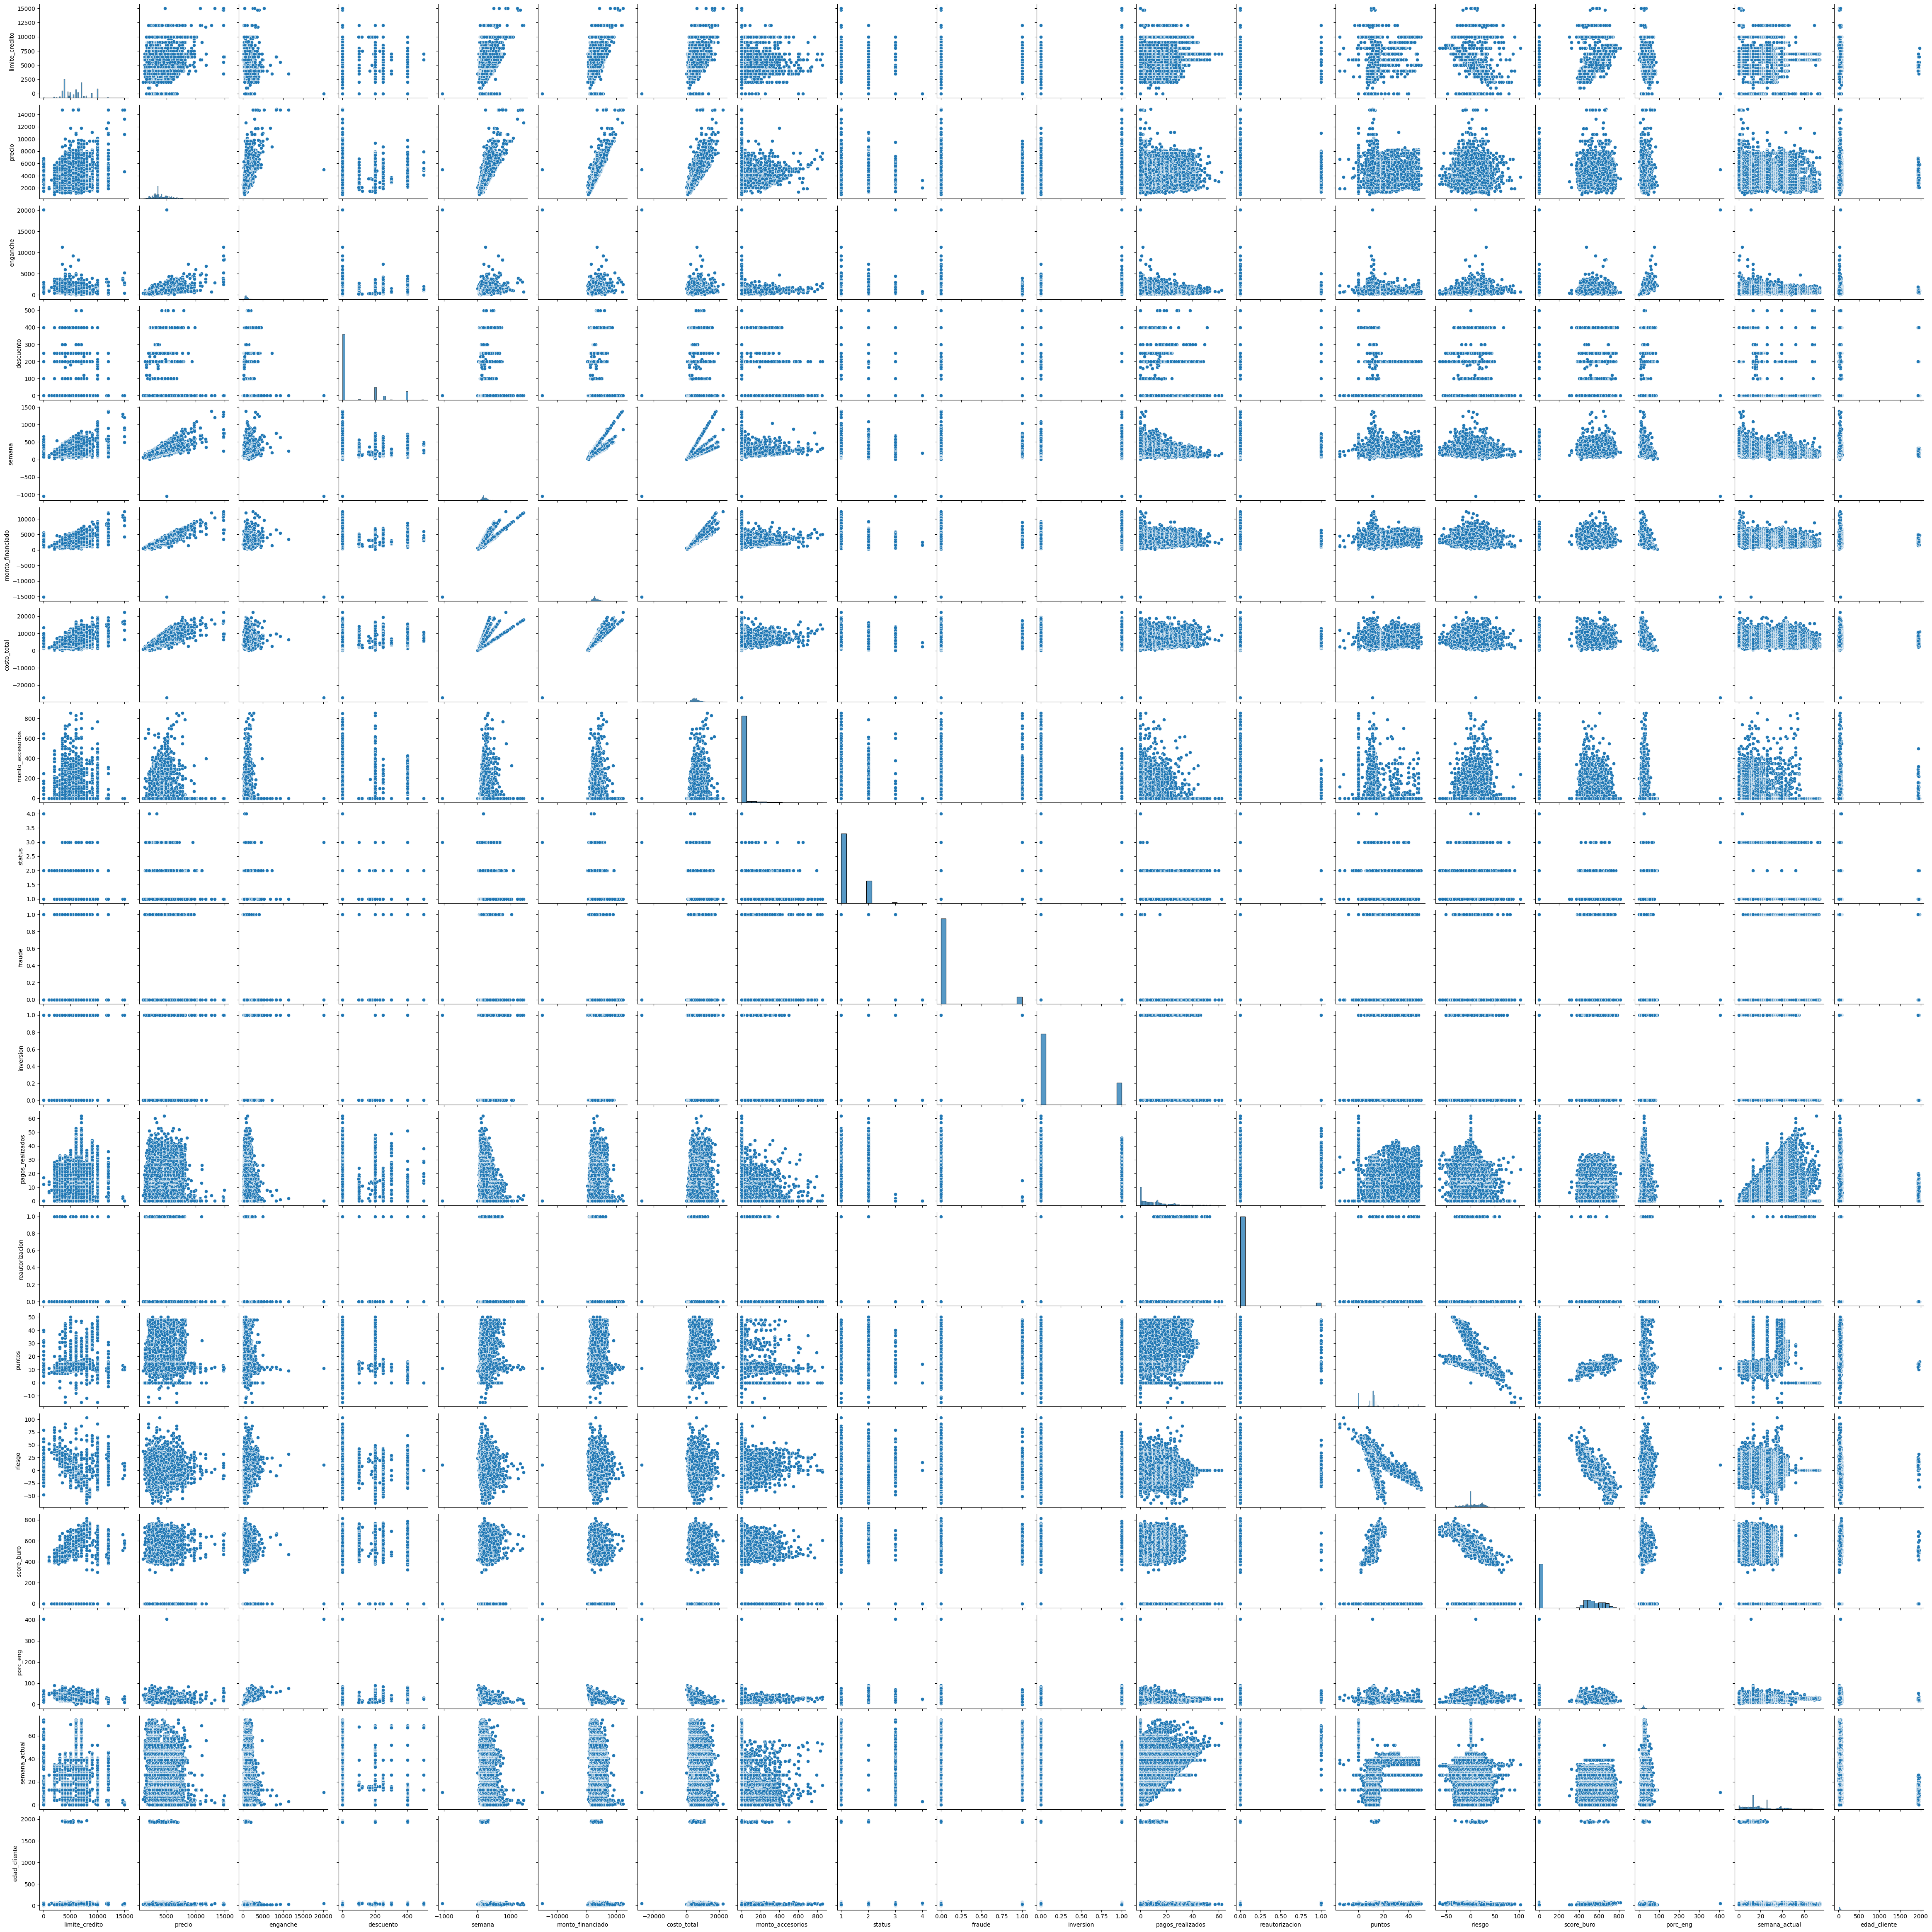

In [12]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(num_df)

In [13]:
Corr_Factors=num_df.corr()
Corr_Factors

limite_credito    precio  enganche  descuento    semana  \
limite_credito          1.000000  0.098488 -0.316161  -0.098742  0.141138   
precio                  0.098488  1.000000  0.678519   0.009883  0.672673   
enganche               -0.316161  0.678519  1.000000  -0.025689  0.339912   
descuento              -0.098742  0.009883 -0.025689   1.000000 -0.026317   
semana                  0.141138  0.672673  0.339912  -0.026317  1.000000   
monto_financiado        0.257862  0.947080  0.408276   0.024136  0.688111   
costo_total             0.258748  0.872403  0.355694   0.036940  0.411911   
monto_accesorios       -0.060431  0.019097  0.031409  -0.006212  0.028635   
status                  0.089538 -0.096183 -0.032450  -0.076093  0.143145   
fraude                 -0.023531  0.060723  0.051645  -0.035743  0.028683   
inversion               0.130953  0.004445 -0.071798   0.240813  0.036724   
pagos_realizados        0.249243  0.017000 -0.080730   0.040920 -0.133589   
reautorizacion          0.073096 -0.057546 -0.022209  -0.016730  0.006011   
puntos                  0.515999  0.073077 -0.175815  -0.087252  0.084821   
riesgo                 -0.725894 -0.042888  0.272575   0.036555 -0.091175   
score_buro             -0.151655  0.080220  0.059764   0.103998  0.072555   
porc_eng               -0.577225 -0.011328  0.676520  -0.050813 -0.158246   
semana_actual           0.329634 -0.030421 -0.094174  -0.112215 -0.189936   
edad_cliente           -0.036883 -0.017535 -0.013872   0.012428 -0.018350   

                  monto_financiado  costo_total  monto_accesorios    status  \
limite_credito            0.257862     0.258748         -0.060431  0.089538   
precio                    0.947080     0.872403          0.019097 -0.096183   
enganche                  0.408276     0.355694          0.031409 -0.032450   
descuento                 0.024136     0.036940         -0.006212 -0.076093   
semana                    0.688111     0.411911          0.028635  0.143145   
monto_financiado          1.000000     0.929859          0.030831 -0.108464   
costo_total               0.929859     1.000000          0.063101 -0.195627   
monto_accesorios          0.030831     0.063101          1.000000 -0.043031   
status                   -0.108464    -0.195627         -0.043031  1.000000   
fraude                    0.052949     0.060782          0.029445 -0.155148   
inversion                 0.036326     0.024614         -0.050677  0.077710   
pagos_realizados          0.052593     0.132380         -0.062232  0.251670   
reautorizacion           -0.062734    -0.086438         -0.026971  0.281953   
puntos                    0.165852     0.159682         -0.040392  0.062583   
riesgo                   -0.169037    -0.171733          0.078120 -0.143361   
score_buro                0.076027     0.060079          0.039010 -0.240651   
porc_eng                 -0.307681    -0.305885          0.029359  0.049292   
semana_actual            -0.002362     0.104572         -0.059894 -0.006862   
edad_cliente             -0.014562    -0.008430          0.034364 -0.018490   

                    fraude  inversion  pagos_realizados  reautorizacion  \
limite_credito   -0.023531   0.130953          0.249243        0.073096   
precio            0.060723   0.004445          0.017000       -0.057546   
enganche          0.051645  -0.071798         -0.080730       -0.022209   
descuento        -0.035743   0.240813          0.040920       -0.016730   
semana            0.028683   0.036724         -0.133589        0.006011   
monto_financiado  0.052949   0.036326          0.052593       -0.062734   
costo_total       0.060782   0.024614          0.132380       -0.086438   
monto_accesorios  0.029445  -0.050677         -0.062232       -0.026971   
status           -0.155148   0.077710          0.251670        0.281953   
fraude            1.000000  -0.045808         -0.290140       -0.053387   
inversion        -0.045808   1.000000          0.183455        0.083254

In [14]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

limite_credito    precio  enganche  descuento    semana  \
limite_credito          1.000000  0.098488  0.316161   0.098742  0.141138   
precio                  0.098488  1.000000  0.678519   0.009883  0.672673   
enganche                0.316161  0.678519  1.000000   0.025689  0.339912   
descuento               0.098742  0.009883  0.025689   1.000000  0.026317   
semana                  0.141138  0.672673  0.339912   0.026317  1.000000   
monto_financiado        0.257862  0.947080  0.408276   0.024136  0.688111   
costo_total             0.258748  0.872403  0.355694   0.036940  0.411911   
monto_accesorios        0.060431  0.019097  0.031409   0.006212  0.028635   
status                  0.089538  0.096183  0.032450   0.076093  0.143145   
fraude                  0.023531  0.060723  0.051645   0.035743  0.028683   
inversion               0.130953  0.004445  0.071798   0.240813  0.036724   
pagos_realizados        0.249243  0.017000  0.080730   0.040920  0.133589   
reautorizacion          0.073096  0.057546  0.022209   0.016730  0.006011   
puntos                  0.515999  0.073077  0.175815   0.087252  0.084821   
riesgo                  0.725894  0.042888  0.272575   0.036555  0.091175   
score_buro              0.151655  0.080220  0.059764   0.103998  0.072555   
porc_eng                0.577225  0.011328  0.676520   0.050813  0.158246   
semana_actual           0.329634  0.030421  0.094174   0.112215  0.189936   
edad_cliente            0.036883  0.017535  0.013872   0.012428  0.018350   

                  monto_financiado  costo_total  monto_accesorios    status  \
limite_credito            0.257862     0.258748          0.060431  0.089538   
precio                    0.947080     0.872403          0.019097  0.096183   
enganche                  0.408276     0.355694          0.031409  0.032450   
descuento                 0.024136     0.036940          0.006212  0.076093   
semana                    0.688111     0.411911          0.028635  0.143145   
monto_financiado          1.000000     0.929859          0.030831  0.108464   
costo_total               0.929859     1.000000          0.063101  0.195627   
monto_accesorios          0.030831     0.063101          1.000000  0.043031   
status                    0.108464     0.195627          0.043031  1.000000   
fraude                    0.052949     0.060782          0.029445  0.155148   
inversion                 0.036326     0.024614          0.050677  0.077710   
pagos_realizados          0.052593     0.132380          0.062232  0.251670   
reautorizacion            0.062734     0.086438          0.026971  0.281953   
puntos                    0.165852     0.159682          0.040392  0.062583   
riesgo                    0.169037     0.171733          0.078120  0.143361   
score_buro                0.076027     0.060079          0.039010  0.240651   
porc_eng                  0.307681     0.305885          0.029359  0.049292   
semana_actual             0.002362     0.104572          0.059894  0.006862   
edad_cliente              0.014562     0.008430          0.034364  0.018490   

                    fraude  inversion  pagos_realizados  reautorizacion  \
limite_credito    0.023531   0.130953          0.249243        0.073096   
precio            0.060723   0.004445          0.017000        0.057546   
enganche          0.051645   0.071798          0.080730        0.022209   
descuento         0.035743   0.240813          0.040920        0.016730   
semana            0.028683   0.036724          0.133589        0.006011   
monto_financiado  0.052949   0.036326          0.052593        0.062734   
costo_total       0.060782   0.024614          0.132380        0.086438   
monto_accesorios  0.029445   0.050677          0.062232        0.026971   
status            0.155148   0.077710          0.251670        0.281953   
fraude            1.000000   0.045808          0.290140        0.053387   
inversion         0.045808   1.000000          0.183455        0.083254

<Axes: >

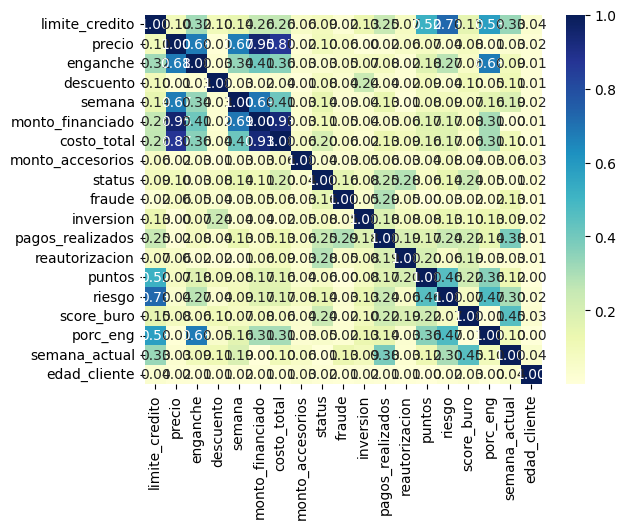

In [15]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

**Definir y Declarar Variables**

In [16]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['limite_credito']]
Var_Dep= df['riesgo']

In [17]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

**MODELO 1 (Modelo Cuadratico)**

In [18]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [25]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['limite_credito'], df['riesgo'])

In [26]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 6.90555999e-07, -1.49067659e-02,  6.61568788e+01])

In [30]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['limite_credito'], df['riesgo'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [28]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

limite_credito
0         3919.083096
1         3968.217759
2         3892.104723
3         4031.932086
4         4031.932086
...               ...
22730     4310.553044
22731     3919.083096
22732     3909.077502
22733     4031.932086
22734     3909.077502

[22735 rows x 1 columns]

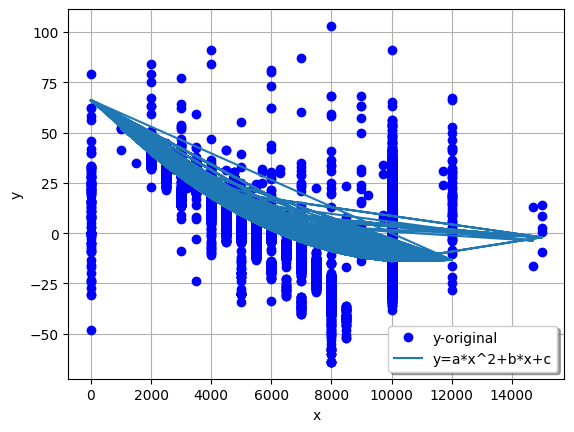

In [31]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [32]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.5722140006829264

**MODELO 2 (Función Senoidal)** 

In [49]:
def func2(x, a, b, c):
    return a * np.sin(b * x) + c

parametros1, _ = curve_fit(func2, df['limite_credito'], df['riesgo'])
a, b, c = parametros1[ 0 ], parametros1[ 1 ], parametros1[ 2 ]

yfit2 = func2(df['limite_credito'], a, b, c)

In [52]:
yfit2

0        4.121758
1        3.492120
2        5.390668
3        5.959055
4        5.959055
           ...   
22730    3.359705
22731    4.121758
22732    3.366985
22733    5.959055
22734    3.366985
Name: limite_credito, Length: 22735, dtype: float64

In [50]:
parametros1

array([-2.11616071,  1.00041171,  5.39066796])

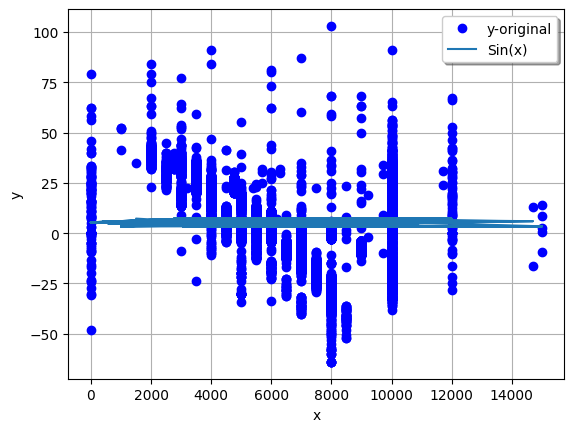

In [60]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="Sin(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [53]:
R2m2 = r2_score(y, yfit2) 
R2m2

0.0067525436487431145

**Modelo 3 (Función Tangencial)**

In [54]:
def func_tan(x, a, b, h, k):
    return a * np.tan(b * (x - h)) + k

parametros2, _ = curve_fit(func_tan, df['limite_credito'], df['riesgo'])
a, b, h, k = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ], parametros2[ 3 ]

yfit3 = func_tan(df['limite_credito'], a, b, h, k)

In [55]:
parametros2

array([0.40163306, 0.99982327, 0.0338793 , 6.49328677])

In [56]:
yfit3

0        6.913953
1       -5.128204
2        6.479677
3        6.126965
4        6.126965
           ...   
22730    1.493535
22731    6.913953
22732    5.917830
22733    6.126965
22734    5.917830
Name: limite_credito, Length: 22735, dtype: float64

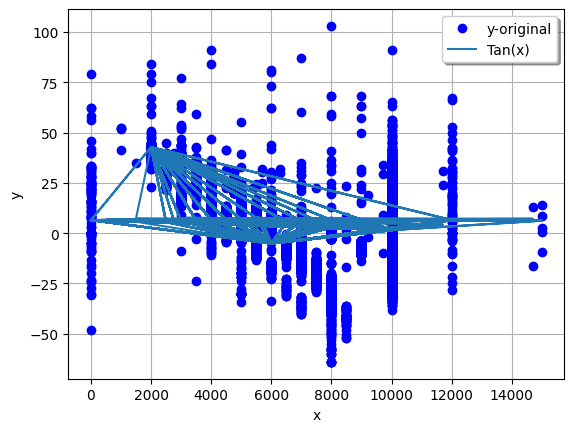

In [61]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit3, label="Tan(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [58]:
R2m3 = r2_score(y, yfit3) 
R2m3

0.0816378209083981

**Modelo 4 (Valor Absoluto)**

In [62]:
def func_abs(x, a, b, k):
    return a * np.abs(x - b) + k

parametros4, _ = curve_fit(func_abs, df['limite_credito'], df['riesgo'])
a, b, k = parametros4[ 0 ], parametros4[ 1 ], parametros4[ 2 ]

yfit4 = func_abs(df['limite_credito'], a, b, k)

In [63]:
parametros4

array([-6.21948383e-03,  1.99999751e+03,  2.97799390e+01])

In [64]:
yfit4

0        11.121472
1         4.901988
2        17.340987
3        -1.317496
4        -1.317496
           ...    
22730   -19.975947
22731    11.121472
22732    12.676343
22733    -1.317496
22734    12.676343
Name: limite_credito, Length: 22735, dtype: float64

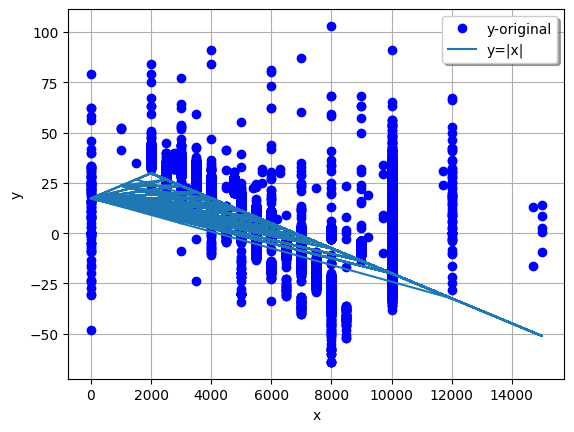

In [67]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit4, label="y=|x|")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [65]:
R2m4 = r2_score(y, yfit4) 
R2m4

0.5411064439198444

**Modelo 5** (cociente entre polinomios)

In [73]:
def func_rat(x, a, b, c, d, e):
    return (a * x**3 + b * x**2 + c * x + d) / (x + e)

parametros5, _ = curve_fit(func_rat, df['limite_credito'], df['riesgo'])
a, b, c, d, e = parametros5

yfit5 = func_rat(df['limite_credito'], a, b, c, d, e)

In [74]:
parametros5

array([ 1.73404516e-06, -3.06135625e-02,  1.17962451e+02,  1.72298278e+04,
        1.47213406e+03])

In [75]:
yfit5

0         9.032363
1        -0.338586
2        11.703980
3        -7.355890
4        -7.355890
           ...    
22730   -11.371620
22731     9.032363
22732    11.679889
22733    -7.355890
22734    11.679889
Name: limite_credito, Length: 22735, dtype: float64

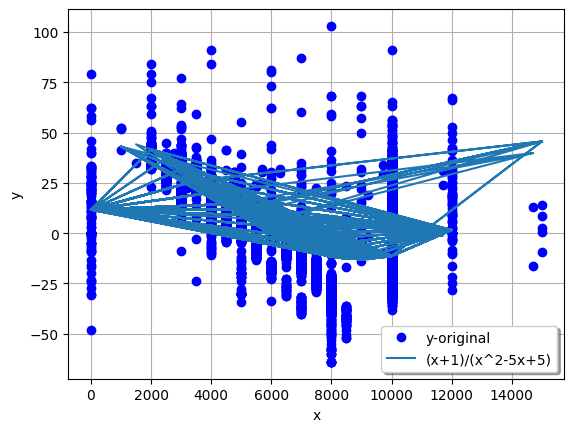

In [79]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit5, label="(x+1)/(x^2-5x+5)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [77]:
R2m5 = r2_score(y, yfit5) 
R2m5

0.6460066838492988